0.7225609955133292


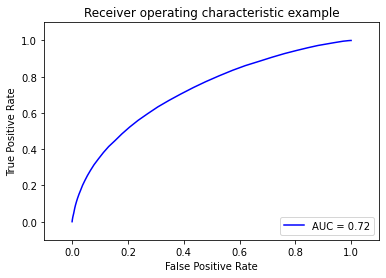

finish


In [1]:
#这个是oasis自己的死亡预测模型评估



# coding=UTF-8
from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
 
#真实值
y_train = pd.read_csv('y_train_result.csv')   # oasis比较特殊，因为我不需要建模，所以直接用 y_train 和 prob 就行

#模型预测值
prob = pd.read_csv('oasis_prob.csv') 

 
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)
 
 
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()

print ('finish')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7289488803960993


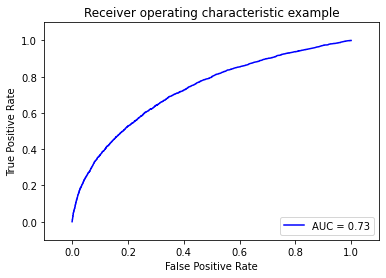

In [2]:
#这个是逻辑回归方法的死亡预测模型评估


# coding=UTF-8

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression 


# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = LogisticRegression()       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)
 
 
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()




0.7384471939082572


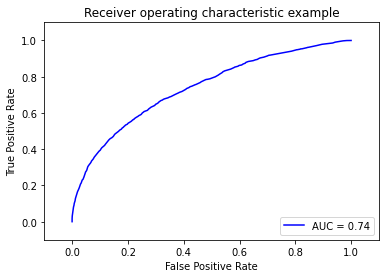

In [3]:
#这个是决策树方法的死亡预测模型评估


# coding=UTF-8

import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = DecisionTreeClassifier(min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()



<ipython-input-4-14db82dbe8f2>:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


0.7491548490833231


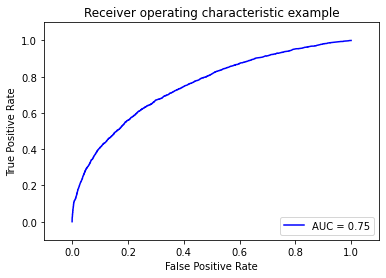

In [4]:
#这个是随机森林的死亡预测模型评估


# coding=UTF-8

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = RandomForestClassifier(n_estimators=100, n_jobs=-1,min_samples_leaf=100,max_depth = 13,max_leaf_nodes = 250)       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7477743091647526


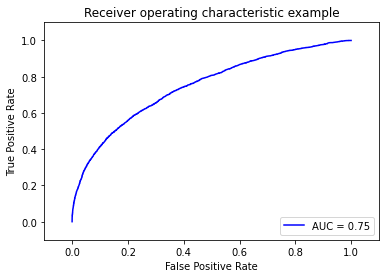

In [5]:
#这个是深度学习神经网络方法的死亡预测模型评估


# coding=UTF-8

from sklearn.model_selection import train_test_split

from sklearn import metrics
import matplotlib.pylab as plt
import csv as csv
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier




# 读取数据
x = pd.read_csv('x_train_att.csv')
y = pd.read_csv('y_train_result.csv')


# 使用train_test_split函数划分数据集(训练集占75%，测试集占25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


model = MLPClassifier()       #建模，用的是x_train和 y_train
model.fit(x_train, y_train)


Log_prob = model.predict_proba(x_test)        #这里应该用test进行检测，后面画图的时候，用的应该也是x_test的预测值和y_test

# print(Log_prob[:,0])



fpr, tpr, thresholds = metrics.roc_curve(y_test, Log_prob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)  #auc为Roc曲线下的面积
print(roc_auc)


plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate') #横坐标是fpr
plt.ylabel('True Positive Rate')  #纵坐标是tpr
plt.title('Receiver operating characteristic example')
plt.show()